In [3]:
import os
import sys
project_root = "/home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch"
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [4]:
from biobb_pytorch.mdae.build_model import buildModel

input_stats_path = "../data/Four_Well_beta3_gamma4_traj_data.stats.pt"
output_model_pth_file = "test_model.pth"

n_features = 2
num_states = 10  

properties = {
    'model_type': 'SPIB',
    'n_cvs': 1,
    'encoder_layers': [n_features, 16],
    'decoder_layers': [16, num_states],
    'options': {
        'encoder': {'activation': 'relu', "last_layer_activation": True},
        'decoder': {'activation': 'relu', "last_layer_activation": False},
        'optimizer': {'lr': 0.001},
        'UpdateLabel': True,
        'patience': 2,
        'refinements': 4,
        'threshold': 1e-2,
        'k': num_states,
        'loss_function': {
            'loss_type': 'InformationBottleneckLoss',
            'beta': 0.01,  
        }
    }
}

buildModel(input_stats_pt_path=input_stats_path,
           output_model_pth_path=output_model_pth_file,
           properties=properties)


2025-07-30 17:30:56,988 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.build_model Version: 5.0.0
2025-07-30 17:30:57,008 [MainThread  ] [INFO ]  Copy: ../data/Four_Well_beta3_gamma4_traj_data.stats.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/7750a21c-d44d-4b8f-b238-6f950ac27b11
2025-07-30 17:30:57,011 [MainThread  ] [INFO ]  ## BioBB AutoEncoder Builder ##
2025-07-30 17:30:57,012 [MainThread  ] [INFO ]  
2025-07-30 17:30:57,012 [MainThread  ] [INFO ]  Hyperparameters:
2025-07-30 17:30:57,013 [MainThread  ] [INFO ]  ----------------
2025-07-30 17:30:57,013 [MainThread  ] [INFO ]  model_type: SPIB
2025-07-30 17:30:57,014 [MainThread  ] [INFO ]  n_cvs: 1
2025-07-30 17:30:57,014 [MainThread  ] [INFO ]  encoder_layers: [2, 16]
2025-07-30 17:30:57,015 [MainThread  ] [INFO ]  decoder_layers: [16, 10]
2025-07-30 17:30:57,015 [MainThread  ] [INFO ]  loss_function: InformationBottleneckLoss(beta=0.01)
2025-07-30 17:30:57,015 [MainThread  ] 

0

In [ ]:
from biobb_pytorch.mdae.train_model import trainModel

properties = {
    'Dataset': {
        'batch_size': 512,
        'split': {'random_split': False,
                  'train_prop': 0.9,
                  'val_prop': 0.1,
        }
    },
    'Trainer': {
        'max_epochs': 32,
        'enable_checkpointing': False,
        'callbacks': {},
        
    },
    'disable_sandbox': True
}

# Inputs
input_model_pth_file = "test_model.pth"
input_dataset_pt_path = "../data/Four_Well_beta3_gamma4_traj_data.pt"

# Outputs
output_model_pth_file = "test_model.pth"
output_model_metrics_file = "test_model_metrics.npz"

trainModel(
    input_model_pth_path=input_model_pth_file,
    input_dataset_pt_path=input_dataset_pt_path,
    output_model_pth_path=output_model_pth_file,
    output_metrics_npz_path=output_model_metrics_file,
    properties=properties
)


2025-07-30 17:30:57,040 [MainThread  ] [INFO ]  ## BioBB Model Trainer ##
2025-07-30 17:30:57,041 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.train_model Version: 5.0.0
2025-07-30 17:30:57,042 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-07-30 17:30:57,044 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/data/Four_Well_beta3_gamma4_traj_data.pt
2025-07-30 17:30:57,050 [MainThread  ] [INFO ]  Start training...


/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/mlcolvar/data/datamodule.py:133: UserWarning: A torch.generator was provided but it is not used with random_split=False
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/mlcolvar/data/datamodule.py:280: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(

  | Name                   | Type                      | Params | Mode  | In sizes | Out sizes
----------------------------------------------------------------------------------------------------
0 | representative_weights | Sequential                | 10     | train | ?        | ?        
1 | encoder                | FeedForward               | 48     | train | [1, 2]   | [1, 16]  
2 | encoder_mean           | Linear                    | 17     | train | [1, 16]  | [1, 1]   
3

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/utilities/data.py:105: Total length of `DictLoader` across ranks is zero. Please make sure this was your intention.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=32` reached.


2025-07-30 17:33:23,572 [MainThread  ] [INFO ]  Training Metrics saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model_metrics.npz
2025-07-30 17:33:23,572 [MainThread  ] [INFO ]  File size: 3.29 KB
2025-07-30 17:33:23,576 [MainThread  ] [INFO ]  Trained Model saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-07-30 17:33:23,576 [MainThread  ] [INFO ]  File size: 11.97 KB
2025-07-30 17:33:23,577 [MainThread  ] [INFO ]  Removed: []


0

Available Training metrics:  ['epoch', 'train_loss', 'train_loss_step', 'train_recon', 'train_recon_step', 'train_kl', 'train_kl_step', 'train_loss_epoch', 'train_recon_epoch', 'train_kl_epoch']


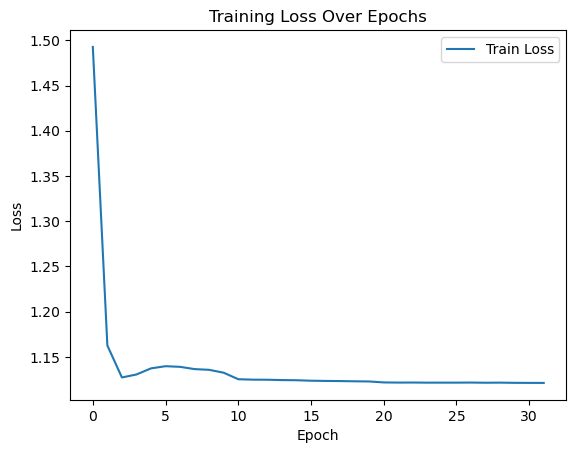

In [6]:
import numpy as np
import matplotlib.pyplot as plt

train_metrics = np.load(output_model_metrics_file)
print("Available Training metrics: ", train_metrics.files)

train_loss = train_metrics['train_loss']

# Plot training loss
plt.plot(train_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [7]:
from biobb_pytorch.mdae.evaluate_model import evaluateModel

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "../data/Four_Well_beta3_gamma4_traj_data.pt"

# Outputs
output_model_results_file = "test_model_results.npz"

properties = {
    'Dataset': {
        'batch_size': 512,
        
        }
    }

evaluateModel(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_model_results_file,
    properties=properties
)


2025-07-30 17:33:23,760 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-30 17:33:23,761 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.evaluate_model Version: 5.0.0
2025-07-30 17:33:23,763 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/56b61e19-cb5f-437d-81eb-27952ddc8432
2025-07-30 17:33:23,772 [MainThread  ] [INFO ]  Copy: ../data/Four_Well_beta3_gamma4_traj_data.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/56b61e19-cb5f-437d-81eb-27952ddc8432
2025-07-30 17:33:23,772 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-07-30 17:33:23,774 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/data/Four_Well_beta3_gamma4_traj_data.pt
2025-07-30 17:33:23,782 [MainThread  ] [INFO ]

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/core/module.py:445: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


2025-07-30 17:33:26,789 [MainThread  ] [INFO ]  Evaluation Results saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model_results.npz
2025-07-30 17:33:26,789 [MainThread  ] [INFO ]  File size: 12.31 MB
2025-07-30 17:33:26,790 [MainThread  ] [INFO ]  Removed: []


0

/tmp/ipykernel_249064/443289484.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = c.get_cmap('viridis', num_states)


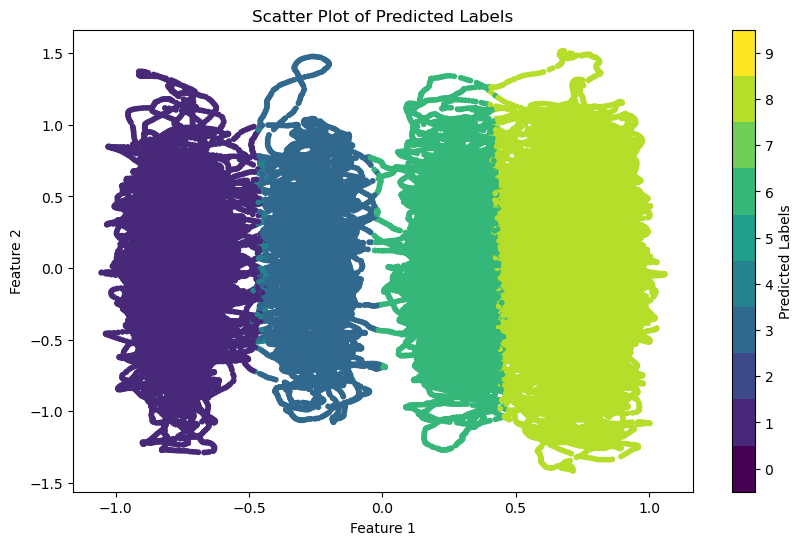

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c

data = torch.load(input_dataset_pt_path)
data = data['data']

outputs = np.load(output_model_results_file, allow_pickle=True)
labels = outputs['labels']

cmap = c.get_cmap('viridis', num_states)  
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap, s=10, alpha=1.0)
plt.colorbar(ticks=range(num_states), label='Predicted Labels')
plt.clim(-0.5, num_states-0.5)  # Set color limits for discrete colors 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Predicted Labels')
plt.show()